# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [63]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
pd.read_csv(r'appl_1980_2014.txt', sep=',')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [4]:
apple = pd.read_csv(r'appl_1980_2014.txt', sep=',')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [13]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [17]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [21]:
apple.index = apple['Date']
apple.index

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

### Step 7.  Is there any duplicate dates?

In [32]:
sum(apple['Date'].duplicated())
#apple.index.duplicated # true가 없음 -> 중복 데이터 없음

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [49]:
#index로 sort 가능
apple.sort_index(inplace=True)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [52]:
#freq='BM' B: 평일 business day, M: 월 마지막 날 포함
pd.date_range(start=apple['Date'].min(), end=apple['Date'].max(), freq='BM')

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

### Step 10.  What is the difference in days between the first day and the oldest

In [53]:
apple['Date'].max()-apple['Date'].min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [62]:
len(pd.date_range(start=apple['Date'].min(), end=apple['Date'].max(), freq='M'))+1
#apple.groupby(by=apple['Date'].dt.year, apple['Date'].dt.month).size()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

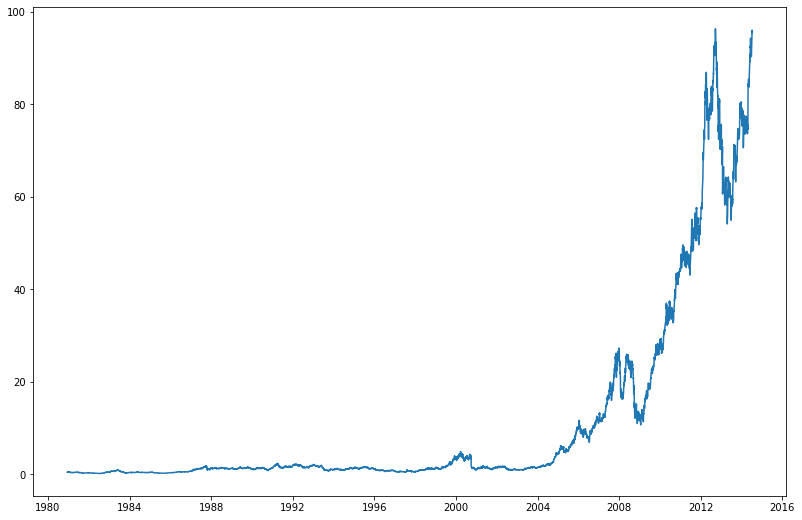

In [66]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])

### BONUS: Create your own question and answer it.